In [2]:
import sys

sys.path.append("../")


from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *

/home/martin/.local/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (None)/charset_normalizer (2.1.0) doesn't match a supported version!
  warnings.warn(


In [5]:
data = compile_team_tracking_data("../data", "Denmark")
df = extract_one_match(data,1)


In [13]:
msds = team_msd_for_dataframe(df, data.iloc[::120].index, 120)

   match_id  Time [s]  Time [s]_team half_team  minute_team  Period_team  \
0         1      0.00           0.00        1H            0            1   
1         1      0.04           0.04        1H            0            1   
2         1      0.08           0.08        1H            0            1   
3         1      0.12           0.12        1H            0            1   
4         1      0.16           0.16        1H            0            1   

    home_6_x  home_6_y  home_18_x  home_18_y  ...  away_14_x  away_14_y  \
0  18.863983  6.937420  16.191383  27.790174  ...        NaN        NaN   
1  18.860191  6.943985  16.196404  27.782358  ...        NaN        NaN   
2  18.856722  6.951682  16.200035  27.776085  ...        NaN        NaN   
3  18.853645  6.960831  16.201321  27.769873  ...        NaN        NaN   
4  18.851160  6.971420  16.199764  27.763958  ...        NaN        NaN   

   away_23_x  away_23_y  away_19_x  away_19_y    ball_x    ball_y    ball_z  \
0        NaN 

In [28]:
print(msds[0])

[0.00000000e+00 5.25956987e-04 2.55435893e-03 7.06990517e-03
 1.53362761e-02 2.93358997e-02 5.04049265e-02 7.96141531e-02
 1.17463973e-01 1.64146433e-01 2.21527579e-01 2.88999429e-01
 3.68931294e-01 4.63273482e-01 5.73178039e-01 6.98154053e-01
 8.38393199e-01 9.93068760e-01 1.16269615e+00 1.34928006e+00
 1.55457976e+00 1.77431413e+00 2.00528514e+00 2.24906004e+00
 2.50906927e+00 2.79114899e+00 3.09529941e+00 3.42594549e+00
 3.78208074e+00 4.15945378e+00 4.56190933e+00 4.97954371e+00
 5.40815513e+00 5.84987928e+00 6.31083813e+00 6.79938938e+00
 7.31120911e+00 7.85520026e+00 8.43696037e+00 9.05585647e+00
 9.70793062e+00 1.03680108e+01 1.10396228e+01 1.17244290e+01
 1.24284828e+01 1.31681520e+01 1.39349142e+01 1.46988143e+01
 1.54331431e+01 1.61170882e+01 1.67745021e+01 1.73862849e+01
 1.79637111e+01 1.85284764e+01 1.91027138e+01 1.96949876e+01
 2.03092678e+01 2.09282366e+01 2.15264685e+01 2.20820749e+01
 2.26201761e+01 2.31400989e+01 2.36491492e+01 2.41481493e+01
 2.46443422e+01 2.514330

In [20]:
msd_PCA = PCAObject(msds)
transformed_msds = msd_PCA.transform(msds)

transformed_msds_sorted_y = sorted()
transformed_msds_sorted_x =


here


In [21]:
clustering_obj = KMeansObject(transformed_msds, 4)
labels = clustering_obj.get_labels()

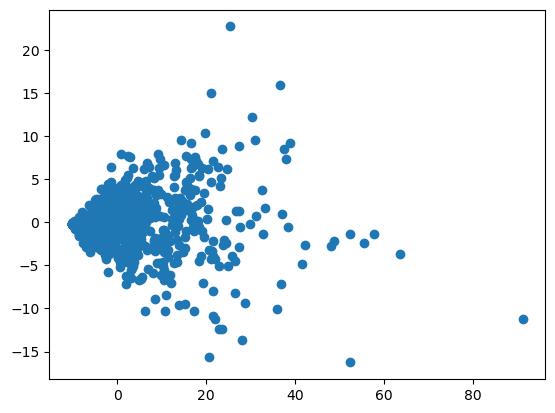

In [29]:
plt.scatter(transformed_msds[:,0], transformed_msds[:,1])

In [25]:
from sklearn.neighbors import KDTree

# Step 1: Build a KDTree from the PCA-reduced real match data
tree = KDTree(transformed_msds)

# Step 2: Query the 10 nearest neighbors for the clicked situation
distances, indices = tree.query(transformed_msds[150].reshape(1, -1), k=10)  # Find 10 nearest neighbors

# Flatten the indices
closest_indices = indices.flatten()
print("Closest situation indices:", closest_indices)


actual_indices = df.iloc[closest_indices].index



Closest situation indices: [150 883 935 955 467 520 906 526 516  68]


In [26]:
generate_pitches_from_start_indices(actual_indices,df,"msd_tests",12,240)

FileNotFoundError: [Errno 2] No such file or directory: 'msd_tests'